Homework 1	
======

### Bike crashes in Pittsburgh

Allegheny County reports on all vehicular crashes, including bicycle crashes. A high profile case occurred in 2015 when a crash involving a Pittsburgh professor was fatal. We'll take a look at crash severity using logistic regression and see if we (1) can identify associations of severity of injury based on factors from the report of the scene and (2) can predict injury severity.

Objectives:

- get comfortable with Python scripts
- conduct logistic regression with sklearn and interpret results in terms of association and prediction
- use appropriate evaluation frameworks for prediction of injury severity
- relate your findings to the Complete Streets initiative


#### 0) Use the code provided to plot a map of Pittsburgh. It should load a map and plot a point at the city center. Load the data file (bikedataonly.csv), a subset of the Allegheny County crash data, into a pandas dataframe.

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1314949.5058986947,383179.25232371234,1380190.429484423,432548.68991229776&bboxSR=2272&imageSR=2272&size=1000,756&dpi=96&format=png32&f=image


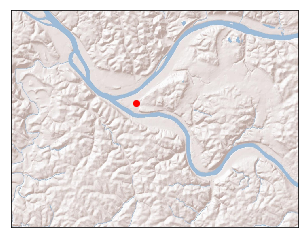

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(
    llcrnrlat=40.361369, llcrnrlon=-80.0955278,
    urcrnrlat=40.501368, urcrnrlon=-79.865723,
    epsg = 2272
)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, verbose=True)
m.scatter([-79.9959],[40.4406], marker = 'o', color='r', latlon=True)  # zorder=5
plt.show()

In [2]:
import pandas as pd
df = pd.read_csv('bikedataonly.csv')

#### 1) Look over: (1)

- [Pittsburgh: complete streets](http://www.bikepgh.org/our-work/advocacy/better-bikeways-vision-and-complete-streets/complete-streets/)
- [PGHBikes report](http://www.bikepgh.org/2016/11/19/biking-walking-safety/)
- [Allegheny county crash data dictionary](https://data.wprdc.org/dataset/3130f583-9499-472b-bb5a-f63a6ff6059a/resource/4df9a3c6-34c1-45a5-936e-80758f9f38a5/download/allegheny-county-crash-data-dictionary.pdf)
- https://data.wprdc.org/dataset/allegheny-county-crash-data

**What bike-related indicators are measured over time? Who are the actors involved in the Complete Streets initiative? What are their a few of their goals and actions?**

The following bike-related indicators are measured:
- Total amount of Bicycles involved
- Total amount of Bicyclist Fatalities
- Total amount of Bicyclist Major Injuries

In addition, the following indicators may be relevant to bike crashes:
- Code for the crash’s relativity to the road
- Roadway Surface Condition Code
- Shoulder Related Indicator
- Code for the weather type at time of crash

The actors involved in the Complete Streets initiative include pedestrians, bicyclists, public transit users, motorists, freight vehicles, the non-profit BikePGH, Mayor Peduto, the Complete Streets Advisory Group. Goals for pedestrians, bicyclists, and BikePGH include devoting resources towards pedestrian and bike infrastructure in Pittsburgh and advocating for policies which reduce crashes and improve pedestrian and bicyclist safety. Mayor Peduto issued an EO to address these demands, forming the Complete Streets Advisory Group to develop better city-wide policies.

#### 2) Obtain some descriptive statistics on the Bike Crash Data. How many injuries are there of each injury severity level? Which other variables appear to be informative? Give summary statistics and or plots. Plot the crashes on a map and distinguish the injury severity level by color. (3 pts)

In [3]:
# Print total injuries
print('Total number of injuries: ', df['INJURY_COUNT'].sum())

# Print injuries by severity
severity_labels = {
    0: 'Not injured',
    1: 'Killed',
    2: 'Major injury',
    3: 'Moderate injury',
    4: 'Minor injury',
    8: 'Injury/ Unknown Severity',
    9: 'Unknown'
}

injuries_grouped = df.groupby('MAX_SEVERITY_LEVEL')['INJURY_COUNT'].sum().reset_index()
injuries_grouped['label'] = injuries_grouped['MAX_SEVERITY_LEVEL'].apply(lambda x: severity_labels[x])

print('\nNumber of injuries by severity level: ')
injuries_grouped[['label', 'INJURY_COUNT']]

Total number of injuries:  568

Number of injuries by severity level: 


,label,INJURY_COUNT
0,Not injured,0
1,Killed,1
2,Major injury,23
3,Moderate injury,173
4,Minor injury,200
5,Injury/ Unknown Severity,171


In [4]:
# Print counts of bicycle crashes by crash type
collision_labels = {
    0: 'Non collision',
    1: 'Rear-end',
    2: 'Head-on',
    3: 'Rear-to-rear (Backing)',
    4: 'Angle',
    5: 'Sideswipe (same dir.)',
    6: 'Sideswipe (Opposite dir.)',
    7: 'Hit fixed object',
    8: 'Hit pedestrian',
    9: 'Other or Unknown'
}

collisions_grouped = df.groupby('COLLISION_TYPE')['BICYCLE'].sum().reset_index()
collisions_grouped['label'] = collisions_grouped['COLLISION_TYPE'].apply(lambda x: collision_labels[x])

collisions_grouped = collisions_grouped.rename(columns={'BICYCLE': 'count'})
print('\nNumber of crashes by collision type: ')
collisions_grouped[['label','count']]


Number of crashes by collision type: 


,label,count
0,Non collision,5
1,Rear-end,43
2,Head-on,38
3,Angle,344
4,Sideswipe (same dir.),55
5,Sideswipe (Opposite dir.),24
6,Hit fixed object,1
7,Hit pedestrian,35
8,Other or Unknown,11


In [5]:
# Print counts of bicycle crashes by relation to road.
road_labels = {
    1: 'On roadway',
    2: 'Shoulder',
    3: 'Median',
    4: 'Roadside (off trafficway; on vehicle area)',
    5: 'Outside trafficway (in area not meant for vehicles)',
    6: 'Outside trafficway (in area not meant for vehicles)',
    7: 'In parking lane',
    8: 'Gore (intersection of ramp and highway)',
    9: 'Unknown'
}

road_grouped = df.groupby('RELATION_TO_ROAD')['BICYCLE'].sum().reset_index()
road_grouped['label'] = road_grouped['RELATION_TO_ROAD'].apply(lambda x: road_labels[x])

road_grouped = road_grouped.rename(columns={'BICYCLE': 'count'})
print('\nNumber of crashes by road location: ')
road_grouped[['label','count']]


Number of crashes by road location: 


,label,count
0,On roadway,500
1,Shoulder,23
2,Roadside (off trafficway; on vehicle area),19
3,Outside trafficway (in area not meant for vehi...,5
4,Outside trafficway (in area not meant for vehi...,6
5,Unknown,3


http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1314949.5058986947,383179.25232371234,1380190.429484423,432548.68991229776&bboxSR=2272&imageSR=2272&size=1000,756&dpi=96&format=png32&f=image


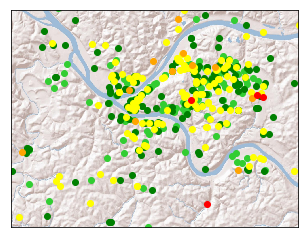

In [6]:
# Plot the crashes on a map and distinguish the injury severity level by color. 
m = Basemap(
    llcrnrlat=40.361369, llcrnrlon=-80.0955278,
    urcrnrlat=40.501368, urcrnrlon=-79.865723,
    epsg = 2272
)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, verbose=True)

# Plot crashes for each severity level separately
level8 = df[df['MAX_SEVERITY_LEVEL'] == 8]
lons = level8['DEC_LONG'].values
lats = level8['DEC_LAT'].values
m.scatter(lons, lats, marker='o', color='limegreen', latlon=True)

level4 = df[df['MAX_SEVERITY_LEVEL'] == 4]
lons = level4['DEC_LONG'].values
lats = level4['DEC_LAT'].values
m.scatter(lons, lats, marker='o', color='green', latlon=True)

level3 = df[df['MAX_SEVERITY_LEVEL'] == 3]
lons = level3['DEC_LONG'].values
lats = level3['DEC_LAT'].values
m.scatter(lons, lats, marker='o', color='yellow', latlon=True)

level2 = df[df['MAX_SEVERITY_LEVEL'] == 2]
lons = level2['DEC_LONG'].values
lats = level2['DEC_LAT'].values
m.scatter(lons, lats, marker='o', color='orange', latlon=True)

level1 = df[df['MAX_SEVERITY_LEVEL'] == 1]
lons = level1['DEC_LONG'].values
lats = level1['DEC_LAT'].values
m.scatter(lons, lats, marker='o', color='red', latlon=True)
    
plt.show()

For our analysis, we will attempt to predict moderate and above injuries versus minor injuries. According to trauma guidelines, mortality rates for minor injuries are approximately 0%, whereas moderate injuries hold a 1-2% mortality rate, and severe and extreme injuries are higher yet. An example of a moderate injury is a fractured sternum.

Create a binary outcome (dependent variable) of "minor" versus "above minor injury" or "minor and moderate" versus "serious and above". Drop all crashes that do not fit into one of your injury categories.
Consider transforming periodic variables (hour of day, month of year, etc.) into sine and cosine terms. For example, cos(2 pi h/24), for h hour of day gives weight to nighttime.

#### 3) Choose an feature of interest. State a hypothesis. Perform one or more logistic regressions, using sklearn.linear_model.LogisticRegression. Report the results. (2)

In [7]:
# Generate outcome variable indicating that injury is above minor
df = df[(df['MAX_SEVERITY_LEVEL']>=1) & (df['MAX_SEVERITY_LEVEL']<=4)].copy()
df['above_minor'] = df['MAX_SEVERITY_LEVEL'].apply(lambda x: 1 if x < 4 else 0 )

For our feature of interest, let's examine 'SPEED_LIMIT'. We hypothesize that an increase in speed limit increases the probability of a moderate to severe injury.

In [19]:
import numpy as np

# Choose speed limit as our independent variable and drop null values
X = df[~df['SPEED_LIMIT'].isnull()]['SPEED_LIMIT'].values
n = len(X)

# Reshape X from 1D to 2D for scikit-learn
X = X.reshape(n, 1)

# Also include squared speed limit as a feature
y = df[~df['SPEED_LIMIT'].isnull()]['above_minor'].values

# Get random permutation of row indices
idx = np.arange(n)
np.random.shuffle(idx)

# Split X and y into train (75%) and test(25%)
n_train = int(n*0.75)
XTrain = X[idx[0:n_train],:]
yTrain = y[idx[0:n_train]]

XTest = X[idx[n_train:n],:]
yTest = y[idx[n_train:n]]

In [20]:
from sklearn.linear_model import LogisticRegression

# Fit a model
model = LogisticRegression()
model.fit(XTrain, yTrain)

# Print out coefficients
beta = model.coef_.reshape(-1)
print('intercept: ', model.intercept_[0])
print('spd_lmt coef: ', beta[0])

intercept:  -0.0129960276144
spd_lmt coef:  -0.00132380943198


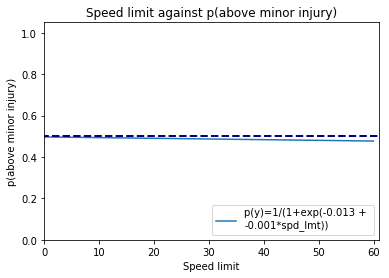

In [21]:
# Plot regression
%matplotlib inline

x_vals = np.linspace(0,60)
x_vals = x_vals.reshape(len(x_vals), 1)
probs = model.predict_proba(x_vals)

label = 'p(y)=1/(1+exp('+str(round(model.intercept_[0], 5)) + " + \n"\
        +str(round(beta[0], 3))+'*spd_lmt))'

plt.plot(x_vals[:,0], probs[:,1], label=label)
plt.plot([-10, 100], [0.5, 0.5], color='navy', lw=2, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlim([0, 61])

plt.xlabel('Speed limit')
plt.ylabel('p(above minor injury)')
plt.title('Speed limit against p(above minor injury)')
plt.legend(loc="lower right")

plt.show()

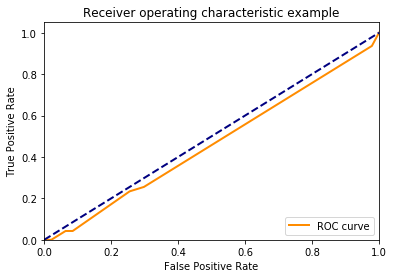

Area under ROC: 0.461973743775


In [18]:
# Plot an ROC curve
from sklearn.metrics import roc_curve, auc

p_y = model.predict_proba(XTest)
fpr, tpr, thresholds = roc_curve(yTest, p_y[:, 1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
print('Area under ROC: ' + str(auc(fpr, tpr)))

#### 4) Interpret statistics (log odds). Provide comments on what variables you decided to include and why. (1)

According to our regression results, the probability of a crash involving an above-minor injury actually decreases very slightly as the speed limit increases. Specifically, a one-unit increase in speed limit is associated with a -0.00132 change in log-odds of an above-minor injury. We chose speed limit as our independent variable because intuitively it seems like higher-speed environments would increase the probability of serious injury. However, evaluation of our regression model shows that speed limit is not very predictive of above-minor injuries.

#### 5) Go for prediction. Create train, tune and test (50/20/30, or CV if desired). Use train and tune sets to iterate over any hyperparameters you set or any features you are considering selecting. Once done, test on test and do not go back. Plot an ROC and calculate the AUC. (3)

In [22]:
variables_to_consider = [
    'AGGRESSIVE_DRIVING',
    'DRIVER_75PLUS', 
    'WET_ROAD',
    'RELATION_TO_ROAD',
    'ROAD_CONDITION',
    'ILLUMINATION',
    'WEATHER'
]

In [25]:
# Split X and y into train (50%), tune (20%), and test(30%)
n = df.shape[0]
n_train = int(n*0.5)
n_tune = int(n*0.2)
n_test = n-n_train-n_tune

idx = np.arange(n)
np.random.shuffle(idx)

train_idx = idx[0:n_train]
tune_idx = idx[n_train:n_train+n_tune]
test_idx = idx[n_train+n_tune:n_train+n_tune+n_test]

# First try each variable individually
for var in variables_to_consider:
    X = pd.get_dummies(df[var], drop_first=True).values
    y = df['above_minor'].values
    XTrain = X[idx[0:n_train], :]
    XTune = X[idx[n_train:n_train+n_tune], :]
    yTrain = y[idx[0:n_train]]
    yTune = y[idx[n_train:n_train+n_tune]]
    
    model = LogisticRegression()
    model.fit(XTrain, yTrain)
    yPredict = model.predict(XTune)
    classification_accuracy = (yTune==yPredict).sum()/n_tune
    print(var + ' classification accuracy: ' + str(classification_accuracy))

# Then try including all variables
X = np.hstack([pd.get_dummies(df[var] , drop_first=True).values for var in variables_to_consider])
y = df['above_minor'].values
XTrain = X[idx[0:n_train], :]
XTune = X[idx[n_train:n_train+n_tune], :]
XTest = X[idx[n_train+n_tune:], :]
yTrain = y[idx[0:n_train]]
yTune = y[idx[n_train:n_train+n_tune]]
yTest = y[idx[n_train+n_tune:]]

model = LogisticRegression()
model.fit(XTrain, yTrain)
yPredict = model.predict(XTune)
classification_accuracy = (yTune==yPredict).sum()/n_tune
print('All features included classification accuracy: ' + str(classification_accuracy))

AGGRESSIVE_DRIVING classification accuracy: 0.526315789474
DRIVER_75PLUS classification accuracy: 0.552631578947
WET_ROAD classification accuracy: 0.539473684211
RELATION_TO_ROAD classification accuracy: 0.552631578947
ROAD_CONDITION classification accuracy: 0.539473684211
ILLUMINATION classification accuracy: 0.526315789474
WEATHER classification accuracy: 0.552631578947
All features included classification accuracy: 0.578947368421


Based on classification accuracy on the tune set, we see that including all six variables in the logistic regression performed better than only including individual predictors.

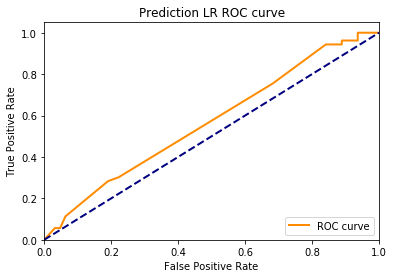

Area under ROC: 0.569781371668


In [26]:
p_y = model.predict_proba(XTest)
fpr, tpr, thresholds = roc_curve(yTest, p_y[:, 1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction LR ROC curve')
plt.legend(loc="lower right")

plt.show()
print('Area under ROC: ' + str(auc(fpr, tpr)))

#### 6) Try to improve prediction using better spatial representations. Create new spatial variables (e.g. distance from city center, spatial buffers along the rivers, proximity to streets with high speed limits, etc.). Perform prediction with logistic regression using only the spatial variables, and state which of these variables you included. Apply to test set, plot an ROC curve, and calculate the AUC. Make statements about the original LR, prediction LR, and spatial LR. (2 pts)

In [29]:
# Pretend coordinates are on a plane and calculate euclidean distance from city center
df['distance_to_CC'] = np.sqrt((df['DEC_LONG']+79.9959)**2 + (df['DEC_LAT']-40.4406)**2)

# Calculate angle from city center
df['angle_from_CC'] = np.arctan2((df['DEC_LONG'] + 79.9959), (df['DEC_LAT']- 40.4406))

# Drop null values
df = df[(~df['distance_to_CC'].isnull())&(~df['distance_to_CC'].isnull())]

In [34]:
# Split X and y into train (75%), and test(25%)
n = df.shape[0]
n_train = int(n*0.75)
n_test = n-n_train

idx = np.arange(n)
np.random.shuffle(idx)

train_idx = idx[0:n_train]
test_idx = idx[n_train:n_train+n_test]

# Then try including all variables
X = df[['distance_to_CC', 'angle_from_CC']].values
y = df['above_minor'].values
XTrain = X[idx[0:n_train], :]
yTrain = y[idx[0:n_train]]
XTest = X[idx[n_train:], :]
yTest = y[idx[n_train:]]

model = LogisticRegression()
model.fit(XTrain, yTrain)
yPredict = model.predict(XTest)
classification_accuracy = (yTest==yPredict).sum()/n_test
print('Spatial LR classification accuracy: ' + str(classification_accuracy))

Spatial LR classification accuracy: 0.46875


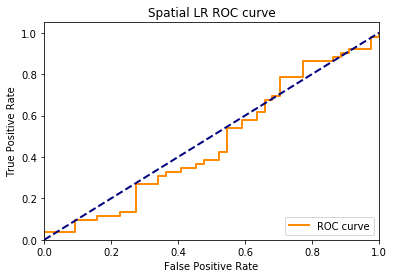

Area under ROC: 0.469405594406


In [35]:
p_y = model.predict_proba(XTest)
fpr, tpr, thresholds = roc_curve(yTest, p_y[:, 1], pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Spatial LR ROC curve')
plt.legend(loc="lower right")

plt.show()
print('Area under ROC: ' + str(auc(fpr, tpr)))

The original LR and spatial LR performed poorly, with predictions performing no better than random guessing. We were able to achieve slightly better performance with the prediction LR, with test set classification accuracy of 0.57. For all three models, different shuffles of the data significantly impacted results, indicating that the data set is likely too small to train generalizable models.

#### 7) Plot a prediction overlay on the map that indicates where, according to your model, crashes are more or less likely to be severe. (1)

In [36]:
# Create mesh grid of coordinates
x1 = np.arange(df['DEC_LONG'].min(), df['DEC_LONG'].max(), (df['DEC_LONG'].max() - df['DEC_LONG'].min())/1000)
x2 = np.arange(df['DEC_LAT'].min(), df['DEC_LAT'].max(), (df['DEC_LAT'].max() - df['DEC_LAT'].min())/1000)
X1, X2 = np.meshgrid(x1, x2)
coords = np.hstack([X1.reshape(X1.shape[0]*X1.shape[1], 1), X2.reshape(X2.shape[0]*X2.shape[1], 1)])

# Generate spatial features from coordinates
X = np.hstack([
        np.sqrt((coords[:,0]+79.9959)**2 + (coords[:,1]-40.4406)**2).reshape(-1,1),
        np.arctan2((coords[:,0] + 79.9959), (coords[:,1] - 40.4406)).reshape(-1,1)
])

# Find predictions for each coordinate
Z = model.predict_proba(X)[:,1].reshape(X1.shape[0], X1.shape[1])

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=1314949.5058986947,383179.25232371234,1380190.429484423,432548.68991229776&bboxSR=2272&imageSR=2272&size=1000,756&dpi=96&format=png32&f=image


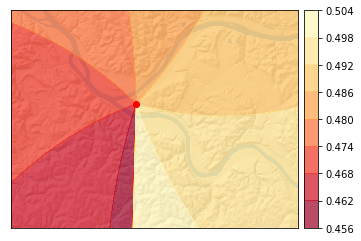

In [37]:
# Plot contour map of predictions
m = Basemap(
    llcrnrlat=40.361369, llcrnrlon=-80.0955278,
    urcrnrlat=40.501368, urcrnrlon=-79.865723,
    epsg = 2272
)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, verbose=True)
m.contourf(X1, X2, Z, latlon=True, alpha=0.7, cmap='YlOrRd_r')
m.colorbar()
m.scatter([-79.9959],[40.4406], marker = 'o', color='r', latlon=True) 

#### 8) Write a summary paragraph or two of statements of findings. Relate it to the references in Question 1. Name future directions. (2)

- Paragraph should include statements about at least one predictor variable and its relationship to above-minor injuries, according to this analysis
- Paragraph should relate findings to concrete policy and make some suggestions for future research questions or data collection plans